In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Data source import complete.



<h1><b><p style="background-image: url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_i55GJPQukV5qBic4yhFxHSJaE3pBgicerQ&s);font-family:tahoma;font-size:150%;color:Navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Telco <span style="color: red;">Customer </span> Churn</p></b></h1>

<img src="https://img.freepik.com/premium-photo/people-figures-with-comment-clouds-their-heads-social-communication-information-exchange_1048944-21824983.jpg?size=626&ext=jpg&uid=R143520149&ga=GA1.1.830550831.1709345650&semt=ais" style="width:90%">


<h1 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;">Author : </span>Danish Mubashar </h1>
<h1 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;">Dataset : </span>Telco Customer Churn </h1>
<h1 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;">Date : </span>07 Apr 2024 </h1>

<h3 style="font-family: 'poppins'; font-weight:bold ; color: Navy;">Hi 👋 everyone! Welcome to my notebook. 📓 I'm passionate about data science, and I'm excited to share my findings with you. 🤓 In my recent notebook, I successfully implemented <span style="color: red;">Telco Customer Churn</span>. If you find this notebook helpful, please <span style="color: red;">|| UPVOTE ||</span> ❤️</h3>

<h2 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;">About Dataset : </span> </h2>
<h2 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;">Context </span> </h2>
<h5 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;"> </span>"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets] </h5>

<h2 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;">Content</span> </h2>
<h5 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"><span style="color: red;"></span> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents</h5>


<a id="1"></a>
<h1><b><p style="background-image: url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_i55GJPQukV5qBic4yhFxHSJaE3pBgicerQ&s);font-family:tahoma;font-size:120%;color:Navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Libraries</p></b></h1>

In [2]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<h1><b><p style="background-image: url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_i55GJPQukV5qBic4yhFxHSJaE3pBgicerQ&s);font-family:tahoma;font-size:120%;color:Navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Read Data</p></b></h1>

In [3]:
# load dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="1"></a>
<h1><b><p style="background-image: url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_i55GJPQukV5qBic4yhFxHSJaE3pBgicerQ&s);font-family:tahoma;font-size:120%;color:Navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">EDA</p></b></h1>

<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Info Of Columns :)</h3>


In [4]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


  * <h5 style="font-family: 'poppins'; font-weight:bold; color: Navy;"> By Using Info Function We Can See Count Of Columns And Rows DataType Of Data And Missing Values Also.In The Data <span style="color: red;">2</span> Columns Are of Int datatype And <span style="color: red;">1</span> Float Datatype And <span style="color: red;">18</span> Are Object Datatype . </h5>
  * <h5 style="font-family: 'poppins'; font-weight:bold; color: Navy;"> In The Data <span style="color: red;">7043</span> Rows And <span style="color: red;">21</span> Columns . </h5>
  *  <h5 style="font-family: 'poppins'; font-weight:bold; color: Navy;"> In The Data <span style="color: red;">2</span> Columns Are of <span style="color: red;">Int</span> datatype <span style="color: red;">1</span> Column <span style="color: red;">Float</span> Datatype And <span style="color: red;">18</span> Columns Are <span style="color: red;">Object</span> Datatype .  </h5>
  *    <h5 style="font-family: 'poppins'; font-weight:bold; color: Navy;"> In The Data <span style="color: red;">TotalCharges</span> Column Is <span style="color: red;">Float</span> Datatype But It Show <span style="color: red;">Object</span> Datatype  </h5>

In [5]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# drop missing values
df.dropna(inplace=True)

# drop customerID
df.drop('customerID', axis=1, inplace=True)

<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Summary Of Numerical Columns :)</h3>


In [7]:
# summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Check Unique Values :)</h3>


In [8]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Check Missing Values :)</h3>


In [9]:
# check missing value
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

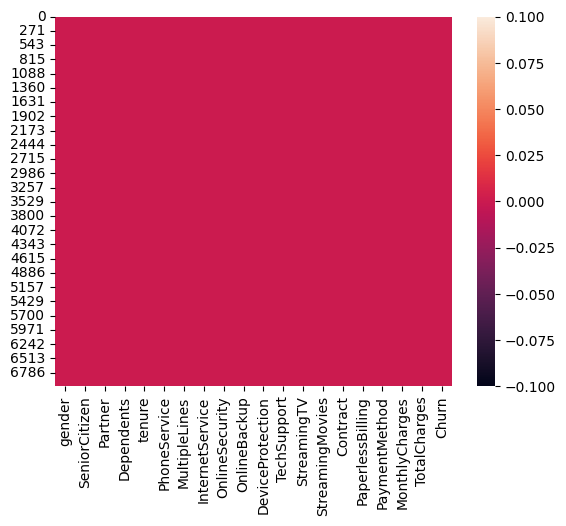

In [10]:
# heatmap for missing value
sns.heatmap(df.isnull())

<h5 style="font-family: 'poppins'; font-weight:bold ; color: Navy;"> In This Dataset  <span style="color: red;">85.71%</span> Is Data Object DataType  And <span style="color: red;">14.29%</span>iIs Numerical Data  || I Used <span style="color: red; font-size: 25px;font-weight:bold ">Count Plot</span>
 For Describe These Object Columns With Respect To <span style="color: red;font-weight:bold">Churn</span> Column </h5>


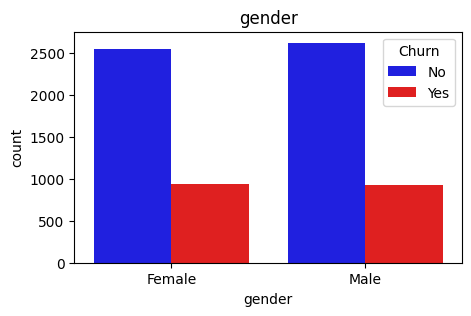

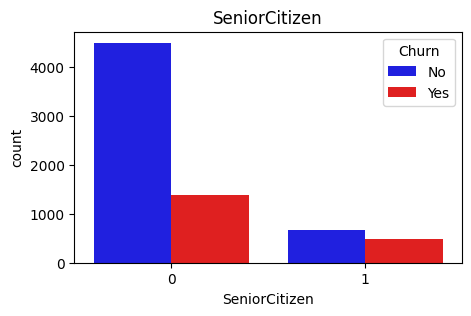

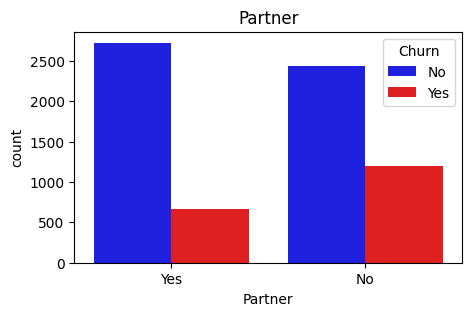

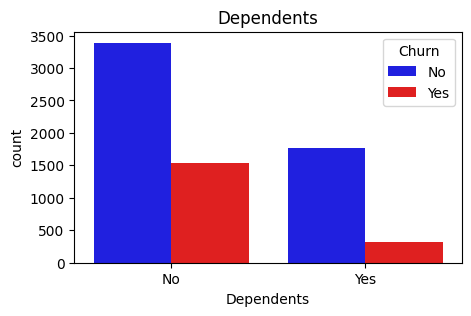

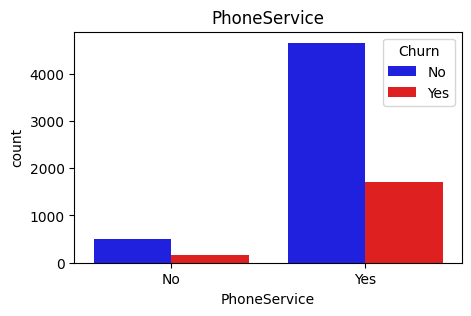

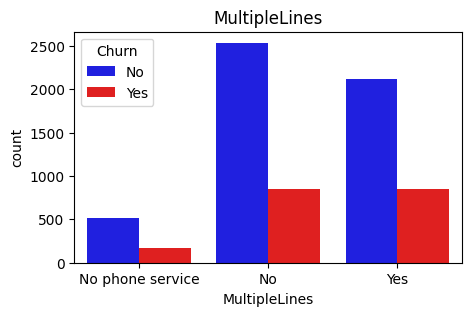

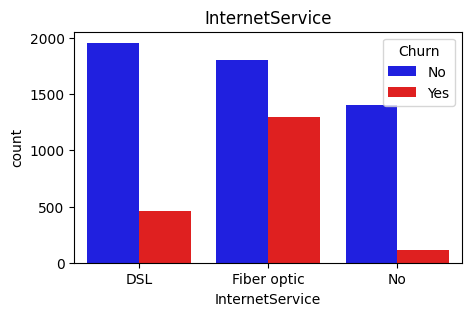

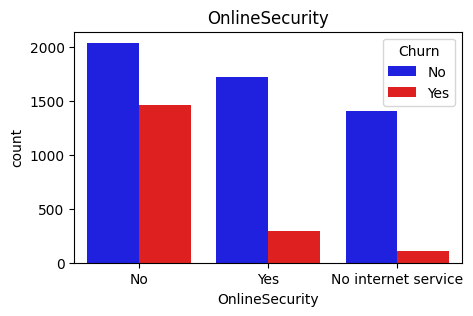

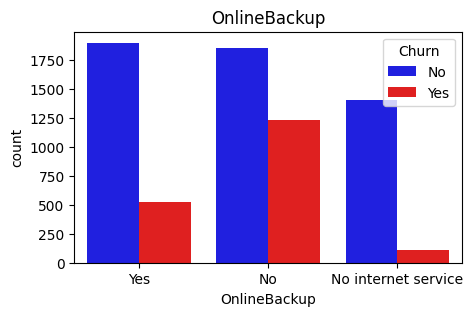

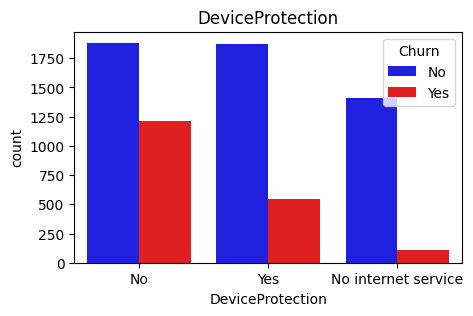

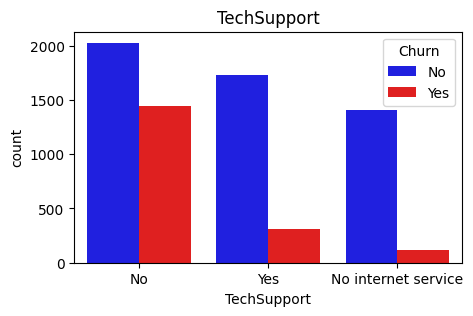

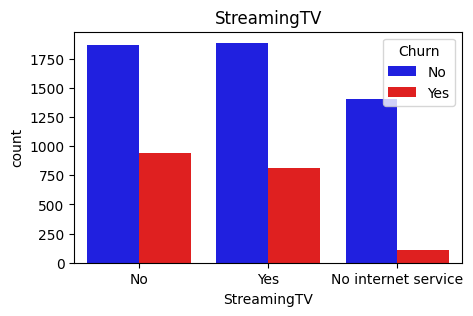

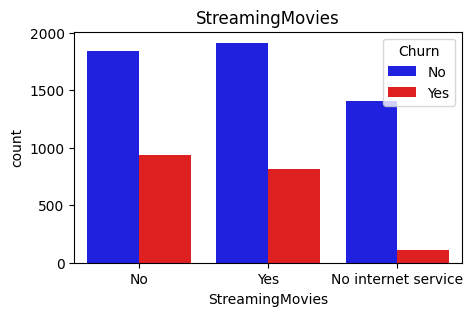

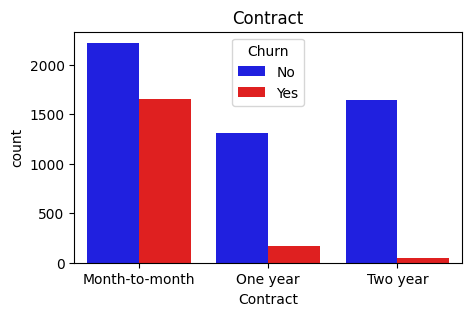

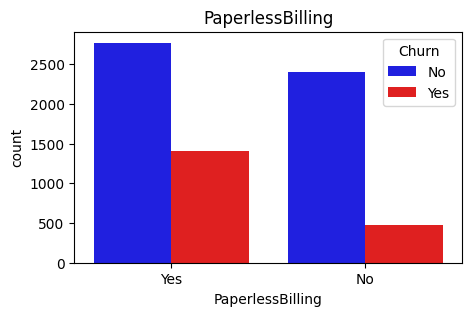

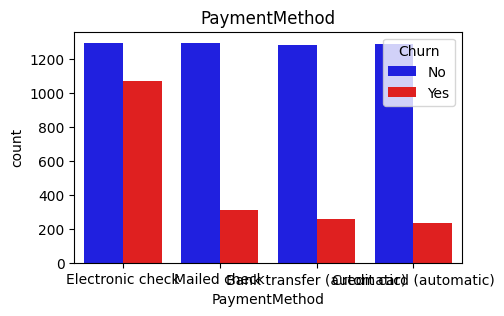

In [11]:

# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()


<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Numerical Data :)</h3>


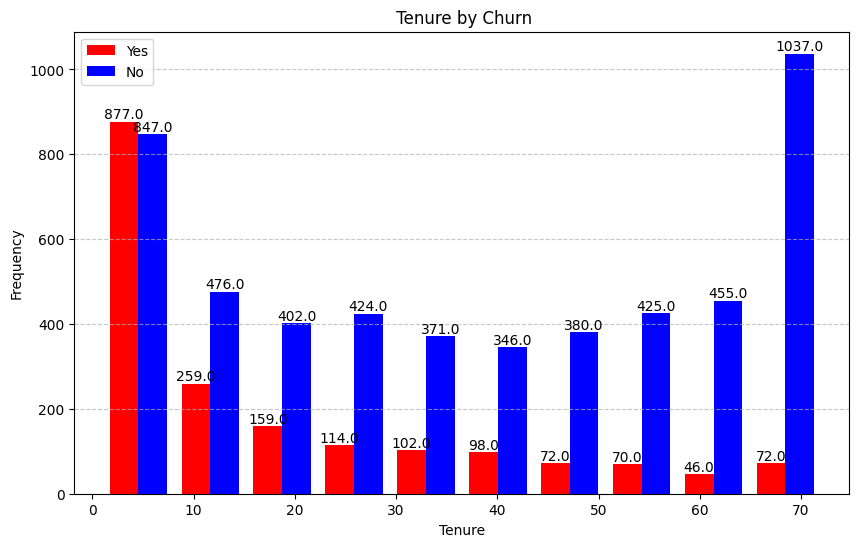

In [12]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


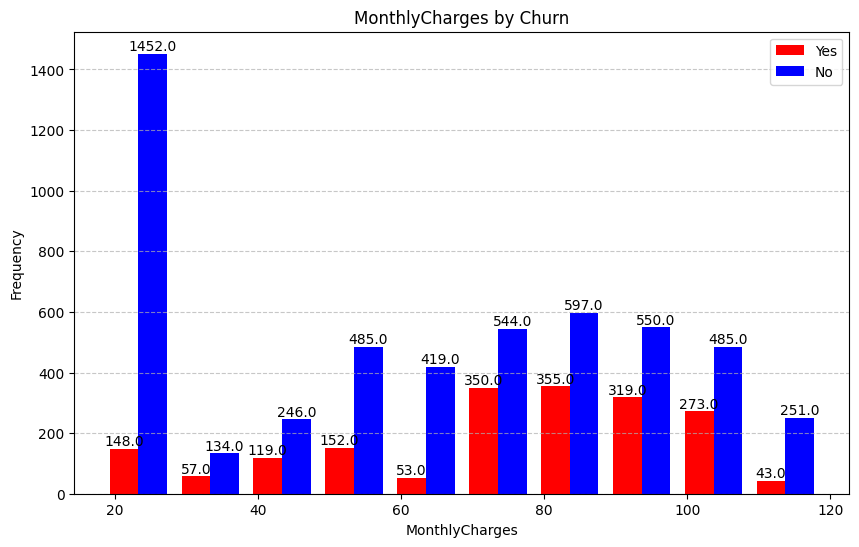

In [13]:
# make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


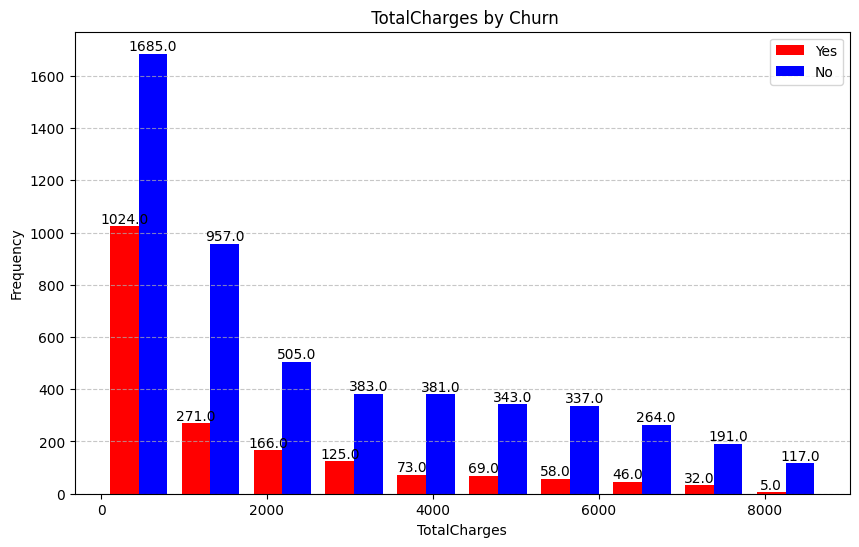

In [14]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


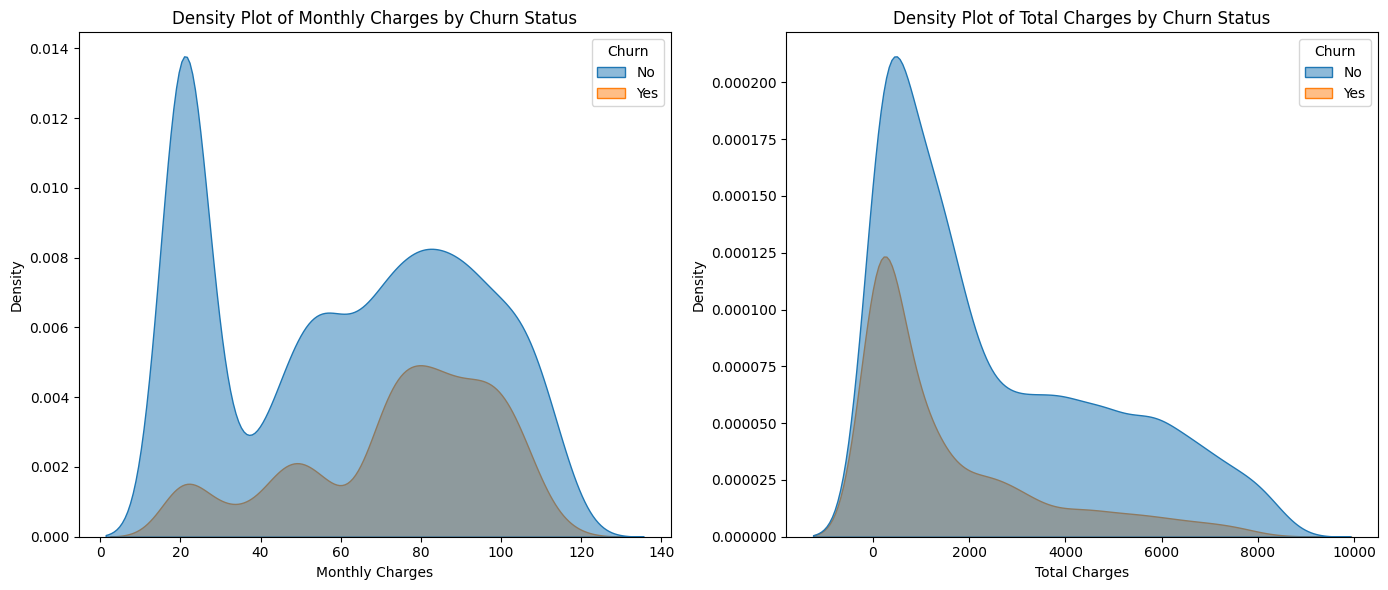

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Conclusion :)</h3>


<h5 style="font-family: 'poppins'; font-weight:bold ; color: Navy;">Customers With <span style="color: red;">Lower</span>  Monthly Charge Are More Likely To Churn</h5>


<a id="1"></a>
<h1><b><p style="background-image: url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_i55GJPQukV5qBic4yhFxHSJaE3pBgicerQ&s);font-family:tahoma;font-size:120%;color:Navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Machine Learning</p></b></h1>

<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Models List :)</h3>


| <span style="font-family: 'poppins'; font-weight:bold; color:navy">Model</span>               | <span style="font-family: 'poppins'; font-weight:bold; color:red">Description</span>                                                                                   | <span style="font-family: 'poppins'; font-weight:bold; color:red">Application</span>                                                                                       |
|---------------------|-----------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Logistic Regression</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Statistical Model for Binary Classification Tasks, Outputting Probability Values.</span>              | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Healthcare (Disease Prediction), Marketing (Customer Churn Analysis)</span>                                |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">K-Nearest Neighbors</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Simple Algorithm Classifying Objects Based on Majority Class of Their K-Nearest Neighbors.</span>    | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Classification and Regression Tasks Where Instances Are Close in Feature Space.</span>                    |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Naive Bayes</span>         | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Probabilistic Classifier Based on Bayes' Theorem with Independence Between Features Assumed.</span>  | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Text Classification, Spam Filtering, Recommendation Systems.</span>                                       |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Support Vector Machine</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Powerful Algorithm Finding Optimal Hyperplane to Separate Classes.</span>                            | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Image Recognition, Text Classification, Bioinformatics.</span>                                             |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Decision Tree</span>       | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Recursively Partitions Data Based on Features to Make Decisions in a Tree-Like Structure.</span>      | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Predictive Modeling, Classification.</span>                                                               |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Random Forest</span>       | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Ensemble Learning Method Aggregating Predictions of Multiple Decision Trees.</span>                  | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Finance, Healthcare, Large Datasets, High-Dimensional Feature Spaces.</span>                               |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">XGBoost</span>             | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Gradient Boosting Algorithm Using Decision Trees as Base Learners and Gradient Descent.</span>       | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Competitions, Industry Applications, Speed and Accuracy.</span>                                            |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Gradient Boosting</span>   | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Sequentially Adds Decision Trees to Correct Errors of Previous Models, Improving Accuracy.</span>    | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Anomaly Detection, Financial Forecasting, High Predictive Accuracy Tasks.</span>                            |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">AdaBoost</span>            | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Ensemble Method Combining Weak Learners, Adjusting Weights Based on Classification Errors.</span>   | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Face Detection, Object Recognition.</span>                                                               |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Other Boosting Algorithms</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Efficient Implementations of Gradient Boosting like LightGBM, Optimizing Training Speed and Memory Usage.</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Large Datasets, High Computational Efficiency Tasks.</span>                                                |
